# 1. PRE-PROCESSING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import nltk
import nltk; nltk.download('popular')
import spacy
import matplotlib.pyplot as plt


%matplotlib inline

Mounted at /content/drive


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# convert the reddit ADHD dataset to a dataframe
# https://www.kaggle.com/datasets/jerseyneo/reddit-adhd-dataset The data can be found under this link
df = pd.read_csv('/content/drive/My Drive/MScProject/adhdwomen.csv', encoding='utf-8')

Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
# drop the columns the topic model won't use - show only title, selftext, url and created_datetime

corpus = df[['title', 'selftext', 'url', 'created_datetime']]
corpus

,title,selftext,url,created_datetime
0,Adult Women Are the New Face of ADHD,NaN,http://www.thedailybeast.com/articles/2014/06/...,2014-07-01 14:07:46
1,Why Women Hide Their ADHD Symptoms,NaN,https://euromd.com/9-diseases-and-conditions/1...,2014-10-08 20:48:14
2,Adult ADHD and Burnout: Success or Failure?,NaN,http://rethinkadhd.wordpress.com/2014/12/23/ad...,2014-12-23 15:34:03
3,How Am I And My ADHD Still Alive?,NaN,http://blogs.psychcentral.com/adhd-man/2015/01...,2015-01-13 23:35:23
4,I'd like to see this subreddit grow!,"Hello, I'm a working, married, mother of 3. I...",https://www.reddit.com/r/adhdwomen/comments/32...,2015-04-11 18:43:49
...,...,...,...,...
44379,Hahaha,[deleted],https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07
44380,I wanted to show you what helps me tremendousl...,NaN,https://i.redd.it/yitzcpeqb2x61.jpg,2021-05-04 08:16:38
44381,How much forgetfulness is normal?,"As in, when should I worry it's not the ADHD c...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48
44382,Having/making friends is so hard for me that m...,Hi! First time posting on this sub. \n\nI (23F...,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 09:19:56


In [ ]:
# drop any rows with missing values

corpus1 = corpus.dropna()
corpus1

,title,selftext,url,created_datetime
4,I'd like to see this subreddit grow!,"Hello, I'm a working, married, mother of 3. I...",https://www.reddit.com/r/adhdwomen/comments/32...,2015-04-11 18:43:49
5,Duplication of historical roles is the cause o...,[deleted],http://keypoints-dictionary.com/polygamy-link-...,2015-09-05 18:01:31
6,Dealing with add,Hello all I saw this and I'm hoping to get it ...,https://www.reddit.com/r/adhdwomen/comments/3o...,2015-10-13 21:03:24
7,Do you have a learning disability? Want to sha...,Subject: Brief Online Study for Students Diagn...,https://www.reddit.com/r/adhdwomen/comments/3s...,2015-11-16 01:15:35
10,When you exhaust the internet looking for vali...,"Some background information: Early 20s, diagno...",https://www.reddit.com/r/adhdwomen/comments/49...,2016-03-06 09:01:29
...,...,...,...,...
44377,I think I might have ADHD and I just want to w...,(I just want to start out and say this post ma...,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:54:40
44378,Connecting common experiences with “ADHD Sympt...,"I have always felt like something was off, but...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:56:21
44379,Hahaha,[deleted],https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07
44381,How much forgetfulness is normal?,"As in, when should I worry it's not the ADHD c...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48


In [ ]:
# remove duplicates

corpus1 = corpus1.drop_duplicates()
corpus1

,title,selftext,url,created_datetime
4,I'd like to see this subreddit grow!,"Hello, I'm a working, married, mother of 3. I...",https://www.reddit.com/r/adhdwomen/comments/32...,2015-04-11 18:43:49
5,Duplication of historical roles is the cause o...,[deleted],http://keypoints-dictionary.com/polygamy-link-...,2015-09-05 18:01:31
6,Dealing with add,Hello all I saw this and I'm hoping to get it ...,https://www.reddit.com/r/adhdwomen/comments/3o...,2015-10-13 21:03:24
7,Do you have a learning disability? Want to sha...,Subject: Brief Online Study for Students Diagn...,https://www.reddit.com/r/adhdwomen/comments/3s...,2015-11-16 01:15:35
10,When you exhaust the internet looking for vali...,"Some background information: Early 20s, diagno...",https://www.reddit.com/r/adhdwomen/comments/49...,2016-03-06 09:01:29
...,...,...,...,...
44377,I think I might have ADHD and I just want to w...,(I just want to start out and say this post ma...,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:54:40
44378,Connecting common experiences with “ADHD Sympt...,"I have always felt like something was off, but...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:56:21
44379,Hahaha,[deleted],https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07
44381,How much forgetfulness is normal?,"As in, when should I worry it's not the ADHD c...",https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48


In [ ]:
# join the columns for title and selftext, as this represents one post and the title of that post from a single user

cols = ['title', 'selftext']

corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
corpus2 = corpus1.drop(columns=['title', 'selftext'])
print(corpus2)

                                                     url     created_datetime  \
4      https://www.reddit.com/r/adhdwomen/comments/32...  2015-04-11 18:43:49   
5      http://keypoints-dictionary.com/polygamy-link-...  2015-09-05 18:01:31   
6      https://www.reddit.com/r/adhdwomen/comments/3o...  2015-10-13 21:03:24   
7      https://www.reddit.com/r/adhdwomen/comments/3s...  2015-11-16 01:15:35   
10     https://www.reddit.com/r/adhdwomen/comments/49...  2016-03-06 09:01:29   
...                                                  ...                  ...   
44377  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 07:54:40   
44378  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 07:56:21   
44379                https://i.redd.it/izcb69jf82x61.jpg  2021-05-04 07:58:07   
44381  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 08:47:48   
44382  https://www.reddit.com/r/adhdwomen/comments/n4...  2021-05-04 09:19:56   

                           

<ipython-input-6-d7418bd022d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus1['title + selftext'] = corpus1[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [ ]:
# only years with a 100 or more posts are included

corpus3 = corpus2[(corpus2['created_datetime'] > '2018-01-01')]
corpus3

,url,created_datetime,title + selftext
76,https://www.reddit.com/r/adhdwomen/comments/7n...,2018-01-03 02:48:26,'Self-management' ADD/ADHD in Male and Female ...
85,https://www.reddit.com/r/sex/comments/7v3ts0/p...,2018-02-04 02:27:18,Problem with orgasm and high libido at the sam...
86,https://www.reddit.com/r/adhdwomen/comments/7v...,2018-02-04 17:27:08,Masking and diagnosis. How much impact do symp...
87,https://www.reddit.com/r/adhdwomen/comments/7v...,2018-02-05 23:59:03,ADHD Mom guilt hitting HARD 😥 [deleted]
88,https://www.reddit.com/r/adhdwomen/comments/7v...,2018-02-07 01:52:50,A Poem [deleted]
...,...,...,...
44377,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:54:40,I think I might have ADHD and I just want to w...
44378,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 07:56:21,Connecting common experiences with “ADHD Sympt...
44379,https://i.redd.it/izcb69jf82x61.jpg,2021-05-04 07:58:07,Hahaha [deleted]
44381,https://www.reddit.com/r/adhdwomen/comments/n4...,2021-05-04 08:47:48,"How much forgetfulness is normal? As in, when ..."


In [ ]:
# remove any deleted posts for privacy reasons and removed posts as did not meet community guidelines (e.g. advertisements)

corpus4 = corpus3[~corpus3['title + selftext'].str.contains('deleted|removed|Survey', case=False)]
corpus5 = corpus4.drop(columns=['url', 'created_datetime'])
corpus5

,title + selftext
76,'Self-management' ADD/ADHD in Male and Female ...
90,..just checking in/reaching for support ..hi!\...
95,Meds and PMS? OMG...this week has been horribl...
99,ADD or Bipolar 2? Just got out of a psychiatry...
106,"Adhd- kinda new Hey, so I think I've always kn..."
...,...
44376,Why am I forgetting things more? and noticing ...
44377,I think I might have ADHD and I just want to w...
44378,Connecting common experiences with “ADHD Sympt...
44381,"How much forgetfulness is normal? As in, when ..."


In [ ]:
# replace backslash and forwardslash with a space

corpus6 = corpus5.replace(to_replace='/', value=' ', regex=True)

Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
# remove: any characters that are not letters or numerical values, whitespace characters and punctuation

import re

def remove_punctuation_and_special_whitespace(text):
    punctuation_removed = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    punctuation_and_special_whitespace_removed = re.sub(r'[\s]', ' ', punctuation_removed)
    return punctuation_and_special_whitespace_removed

corpus6['title + selftext'] = corpus6['title + selftext'].apply(remove_punctuation_and_special_whitespace)

corpus6

,title + selftext
76,Self management ADD ADHD in Male and Female ...
90,just checking in reaching for support hi ...
95,Meds and PMS OMG this week has been horribl...
99,ADD or Bipolar 2 Just got out of a psychiatry...
106,Adhd kinda new Hey so I think I ve always kn...
...,...
44376,Why am I forgetting things more and noticing ...
44377,I think I might have ADHD and I just want to w...
44378,Connecting common experiences with ADHD Sympt...
44381,How much forgetfulness is normal As in when ...


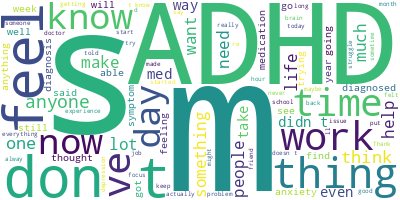

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(corpus6['title + selftext'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

https://github.com/bhargavvader/personal/issues/5

https://nicharuc.github.io/topic_modeling/

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in corpus6['title + selftext']])

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [ ]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [ ]:
# Define stop word list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'm', 'subject', 're', 'edu', 'use', 'not', 'would', 'https', 'com', 'one', 'things',
                       'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'got', 'do', 'done', 'try', 'many',
                       'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                       'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                       'like', 'always', 'really', 'anyone', 'adhd', 'something', 'much', 'im', 'told', 'said', 'still',
                       'started', 'going', 'never', 'since', 'else', 'start', 'today', 'u', 'getting', 'start', 'started', 'way',
                       'sometimes', 'way', 'anything', 'thing', 'u', 'day', 'everything', 'thing'])


# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [ ]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

# filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
#                                                  trigram_filter(trigram['trigram'])\
#                                                  and trigram.pmi > 5, axis = 1)][:500]


bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
# trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [ ]:
# examples of bigrams
bigrams[:10]

['bare minimum',
 'rabbit hole',
 'anti depressants',
 'sensory overload',
 'r adhdwomen',
 'bullet journal',
 'imposter syndrome',
 'Psychiatry UK',
 'extended release',
 'Fast forward']

In [ ]:
# Concatenate n-grams
def replace_ngram(x):
    # for gram in trigrams:
    #     x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [ ]:
posts_w_ngrams = corpus6.copy()

In [ ]:
posts_w_ngrams['title + selftext'] = posts_w_ngrams['title + selftext'].map(lambda x: replace_ngram(x))

Anderson, K. (2023) *Stuff I've Seen: A System for Personal Information Retrieval and Re-use*. Research Paper Presentation for ECS736P. Unpublished.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess(row):
    # Create a string by concatenating all the values in the row
    concatenated_string = ' '.join(row.values.astype(str))
    # Lowercase
    lowercase_string = concatenated_string.lower()
    # Split into words
    lowercase_words = lowercase_string.split(' ')
    # Remove stop words
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'm', 'subject', 're', 'edu', 'use', 'not', 'utm', 'would', 'https', 'com', 'one', 'things',
                       'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'got', 'do', 'done', 'try', 'many',
                       'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                       'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                       'like', 'always', 'really', 'anyone', 'adhd', 'something', 'much', 'im', 'told', 'said', 'still',
                       'started', 'going', 'never', 'since', 'else', 'start', 'today', 'u', 'getting', 'start', 'started', 'way',
                       'sometimes', 'way', 'anything', 'thing', 'u', 'day', 'everything', 'thing', 'someone', 'life', 'dont'])
    filtered_words = [word for word in lowercase_words if word not in stop_words and len(word) > 2]
    # Tokenize
    tokens = word_tokenize(' '.join(filtered_words))
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    # allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized_tokens

posts_w_ngrams['pre_processed'] = posts_w_ngrams[['title + selftext']].apply(preprocess, axis=1)
corpus7 = posts_w_ngrams.drop(columns=['title + selftext'])
print(corpus7)

                                           pre_processed
76     [self, management, add, male, female, adult, m...
90     [checking, reaching, support, thanks, reading,...
95     [med, pm, omg, week, horrible, feel, totally, ...
99     [add, bipolar, psychiatry, appointment, think,...
106    [kinda, new, hey, known, different, finally, t...
...                                                  ...
44376  [forgetting, noticing, other_adhd, symptom, lo...
44377  [might, write, feeling, post, whole, mess, sor...
44378  [connecting, common, experience, symptom, felt...
44381  [forgetfulness, normal, worry, causing, forget...
44382  [making, friend, hard, time, first, time_posti...

[13541 rows x 1 columns]


In [ ]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [ ]:
corpus8 = corpus7['pre_processed'].map(noun_only)

In [ ]:
data = corpus8.values.tolist()
data_words = list(data)
print(data_words[:1][0][:30])

['management', 'adult', 'manage', 'trait', 'keep', 'plenty', 'time', 'night', 'work', 'part', 'cant', 'example', 'control', 'morning', 'decision', 'phone', 'driving', 'buying', 'food', 'issue', 'wave', 'stay', 'system', 'week', 'hit', 'ware', 'attention', 'detail', 'sense', 'care']


**Exploratory data analysis**

In [ ]:
post_length = [len(tokens) for tokens in corpus7['pre_processed']]

print(post_length)

post_length_df = pd.DataFrame(post_length, columns=['Post_length'])
post_length_df

[116, 22, 21, 142, 120, 31, 105, 106, 122, 14, 49, 63, 253, 626, 77, 46, 48, 63, 45, 49, 5, 61, 46, 23, 53, 124, 25, 58, 55, 86, 42, 88, 122, 71, 85, 86, 37, 30, 147, 20, 104, 44, 6, 126, 99, 10, 37, 32, 517, 21, 39, 50, 111, 98, 83, 164, 23, 98, 61, 82, 52, 249, 168, 40, 51, 477, 70, 166, 76, 147, 92, 87, 77, 173, 28, 71, 13, 30, 5, 64, 121, 136, 128, 30, 54, 32, 79, 217, 296, 39, 80, 20, 129, 90, 73, 21, 154, 82, 56, 181, 28, 73, 79, 60, 31, 119, 165, 23, 110, 86, 81, 115, 45, 227, 46, 298, 25, 42, 188, 7, 158, 87, 150, 101, 9, 65, 238, 311, 77, 151, 64, 40, 85, 27, 68, 58, 26, 285, 102, 146, 42, 42, 67, 303, 66, 10, 45, 78, 58, 32, 62, 77, 76, 37, 25, 29, 53, 144, 134, 50, 54, 48, 88, 179, 128, 75, 48, 57, 100, 245, 241, 79, 46, 20, 307, 161, 32, 15, 82, 44, 16, 80, 175, 24, 17, 7, 111, 169, 35, 76, 27, 87, 186, 102, 158, 39, 67, 260, 49, 79, 39, 76, 70, 126, 46, 21, 105, 13, 81, 116, 65, 26, 46, 14, 37, 31, 19, 74, 55, 35, 40, 10, 67, 12, 76, 11, 33, 22, 11, 142, 65, 95, 13, 215, 5

,Post_length
0,116
1,22
2,21
3,142
4,120
...,...
13536,79
13537,118
13538,196
13539,101


In [ ]:
post_length_df.describe()

,Post_length
count,13541.000000
mean,81.611476
std,73.288098
min,0.000000
25%,40.000000
50%,61.000000
75%,99.000000
max,1156.000000


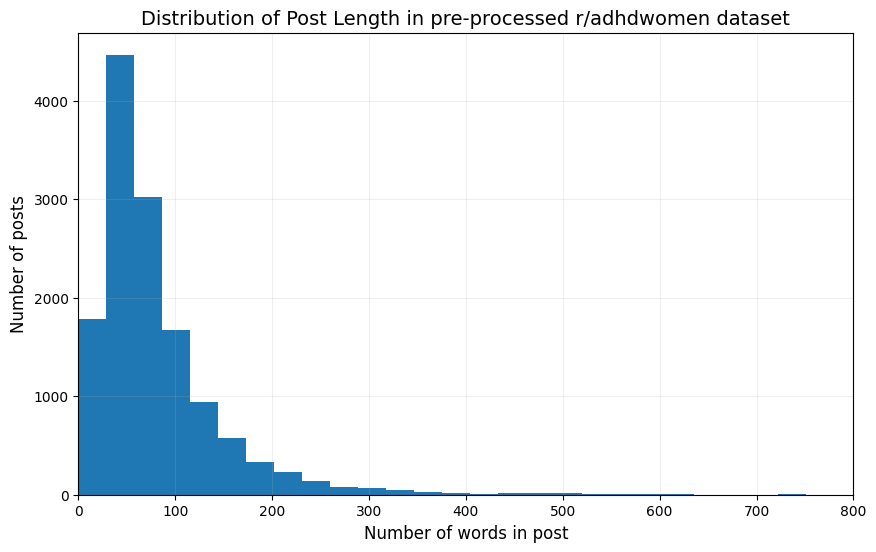

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


post_length_df.hist(bins=40, figsize=(10,6))
plt.title('Distribution of Post Length in pre-processed r/adhdwomen dataset', fontsize=14)
plt.xlabel('Number of words in post', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.grid(alpha=0.2)


plt.xlim(0,800)

plt.show()



# 2. MODELLING DATA

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
final_corpus = [id2word.doc2bow(text) for text in texts]
# View
print(final_corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1)]


In [ ]:
# save and load models using pickle

import pickle

def save_model(model, file_name):
  file_path = '/content/drive/MyDrive/MScProject/' + file_name
  with open(file_path, 'wb') as f:
    pickle.dump(model, f)
  return file_path

def load_model(file_name):
  file_path = '/content/drive/MyDrive/MScProject/' + file_name
  with open(file_path, 'rb') as f:
    model = pickle.load(f)
  return model

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

Text(0, 0.5, 'NPMI Score')

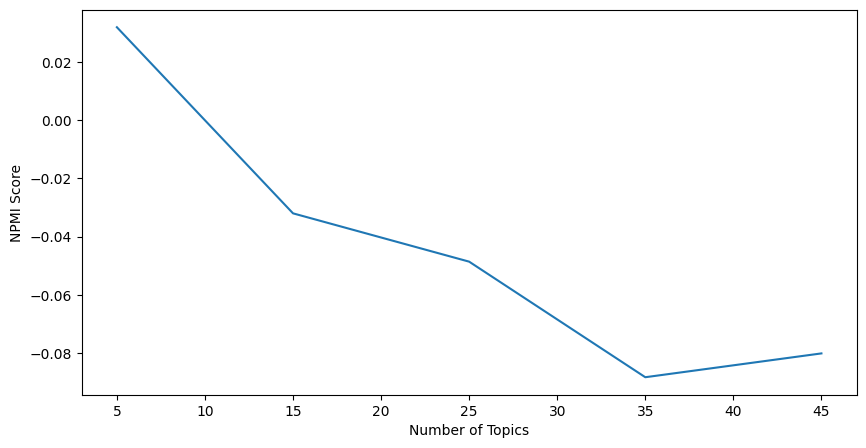

In [ ]:
import gensim

from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
import numpy as np

topics = list(np.arange(5, 50, 10))

# compute coherence
model_coherence = []
for num_topics in topics:
    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, passes=40)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
    coherence_lda = coherence_model_lda.get_coherence()
    model_coherence.append(coherence_lda)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(5, 50, 10)),model_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("NPMI Score")

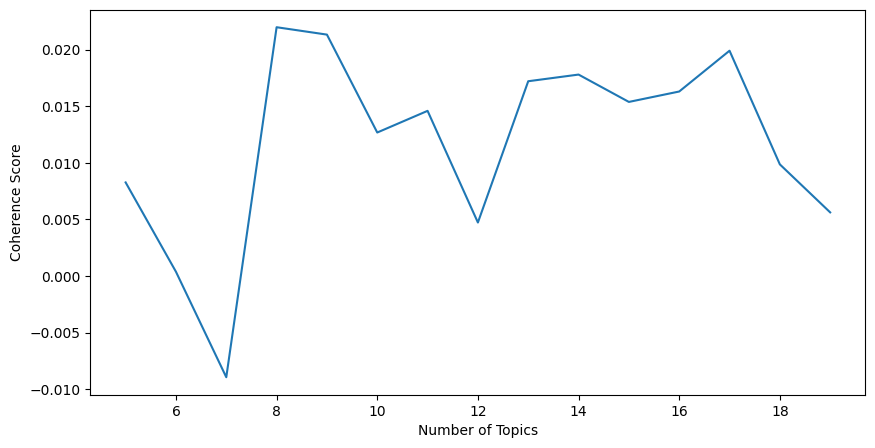

In [ ]:
import gensim

from gensim.models import CoherenceModel
from matplotlib import pyplot as plt


# compute coherence
model_coherence = []
for num_topics in range(5,20):
    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, passes=40)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
    coherence_lda = coherence_model_lda.get_coherence()
    model_coherence.append(coherence_lda)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(5,20),model_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [ ]:
lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=8, random_state=100, passes=40)
lda_model.show_topics(8, num_words=10, formatted=False)

[(0,
  [('food', 0.04175926),
   ('eat', 0.035441667),
   ('water', 0.017262308),
   ('meal', 0.012521983),
   ('exercise', 0.010911439),
   ('plan', 0.0094764065),
   ('hair', 0.008219411),
   ('weight', 0.008064056),
   ('snack', 0.007994085),
   ('dinner', 0.0076455264)]),
 (1,
  [('medication', 0.028983857),
   ('week', 0.028125508),
   ('day', 0.027889464),
   ('work', 0.02557347),
   ('feel', 0.025252791),
   ('vyvanse', 0.020415645),
   ('month', 0.015548446),
   ('hour', 0.014705313),
   ('morning', 0.014570851),
   ('period', 0.014438848)]),
 (2,
  [('time', 0.042084917),
   ('work', 0.03710802),
   ('task', 0.018733634),
   ('feel', 0.01618644),
   ('help', 0.014890995),
   ('hour', 0.013266899),
   ('brain', 0.012617547),
   ('book', 0.010784821),
   ('focus', 0.010135109),
   ('project', 0.009240824)]),
 (3,
  [('job', 0.060963504),
   ('work', 0.05366708),
   ('time', 0.023376292),
   ('week', 0.017026763),
   ('month', 0.013155659),
   ('office', 0.013033873),
   ('year',

In [ ]:
lda_model = gensim.models.LdaModel(corpus=final_corpus, id2word=id2word,
                                       num_topics=17, random_state=100, passes=40, eta=0.01, alpha=0.05)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence npmi score:', coherence_lda)

lda_model.show_topics(17, num_words=10, formatted=False)

Coherence npmi score: 0.01258470843099457


[(0,
  [('test', 0.040419806),
   ('issue', 0.036153253),
   ('symptom', 0.034726),
   ('question', 0.032909103),
   ('memory', 0.030196587),
   ('struggle', 0.0259102),
   ('attention', 0.025597524),
   ('result', 0.016601112),
   ('personality', 0.016341338),
   ('example', 0.0138666965)]),
 (1,
  [('tip', 0.057492577),
   ('coffee', 0.053396083),
   ('help', 0.045079987),
   ('advice', 0.024168938),
   ('suggestion', 0.02027093),
   ('planner', 0.020253872),
   ('share', 0.014520713),
   ('loss', 0.012750936),
   ('trick', 0.012594993),
   ('guy', 0.012453824)]),
 (2,
  [('time', 0.077930264),
   ('work', 0.07203924),
   ('hour', 0.050769437),
   ('week', 0.029133199),
   ('day', 0.022395508),
   ('feel', 0.018143997),
   ('task', 0.017521972),
   ('night', 0.01615425),
   ('home', 0.0152576035),
   ('morning', 0.01398644)]),
 (3,
  [('woman', 0.051219247),
   ('book', 0.044164825),
   ('post', 0.025475705),
   ('research', 0.021692077),
   ('share', 0.020866215),
   ('help', 0.0195

*Parameter tuning for alpha and beta values*

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaModel(corpus=final_corpus,
                                           id2word=id2word,
                                           num_topics=k,
                                           random_state=100,
                                           passes=40,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')

    return coherence_model_lda.get_coherence()

In [ ]:
import gensim

from gensim.models import CoherenceModel

import numpy as np
import tqdm

corpus = final_corpus
pre_determined_num_topics = 17

grid = {}
grid['Validation_Set'] = {}

# Alpha parameter
alpha = list(np.arange(0.01, 0.09, 0.04))
alpha.append('symmetric')
# alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 0.09, 0.04))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(corpus_title)))

# iterate through validation corpuses
for i in range(len(corpus_sets)):
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cnpmi = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                          k=pre_determined_num_topics, a=a, b=b)
            # Save the model results
            model_results['Validation_Set'].append(corpus_title[i])
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cnpmi)

            pbar.update(1)
pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
pbar.close()


In [ ]:
import gensim
from gensim.models import CoherenceModel
import numpy as np

eta_values = np.array([0.02, 0.009, 0.006])


# compute coherence
model_coherence = []
for eta in eta_values:
  lda_model = gensim.models.LdaMulticore(corpus=final_corpus, id2word=id2word,
                                       num_topics=17, random_state=100, passes=40, eta=eta)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
  coherence_lda = coherence_model_lda.get_coherence()
  model_coherence.append(coherence_lda)

print('Coherence npmi score:', model_coherence)

Coherence npmi score: [0.03664998802595875, 0.032112591339916424, 0.03479699739501542]


In [ ]:
lda_model = gensim.models.LdaModel(corpus=final_corpus, id2word=id2word,
                                       num_topics=17, random_state=100, passes=40, eta=0.01, alpha=0.05)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence npmi score:', coherence_lda)

lda_model.show_topics(17, num_words=10, formatted=False)

In [ ]:
lda_model = gensim.models.LdaModel(corpus=final_corpus, id2word=id2word,
                                       num_topics=8, random_state=100, passes=40)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence npmi score:', coherence_lda)

lda_model.show_topics(8, num_words=10, formatted=False)

Coherence npmi score: 0.028019841595638778


[(0,
  [('time', 0.036981218),
   ('work', 0.02625817),
   ('hour', 0.023029994),
   ('food', 0.020215143),
   ('day', 0.018142466),
   ('week', 0.01701968),
   ('morning', 0.016564354),
   ('eat', 0.015812319),
   ('feel', 0.01437601),
   ('brain', 0.013930616)]),
 (1,
  [('room', 0.02597906),
   ('house', 0.023474291),
   ('list', 0.022213329),
   ('car', 0.021912053),
   ('item', 0.011764043),
   ('floor', 0.011539066),
   ('box', 0.010764202),
   ('store', 0.009680457),
   ('money', 0.009638447),
   ('home', 0.00950138)]),
 (2,
  [('feel', 0.03161636),
   ('friend', 0.018112456),
   ('time', 0.018088616),
   ('year', 0.014125646),
   ('person', 0.012519335),
   ('family', 0.011481255),
   ('parent', 0.011370594),
   ('relationship', 0.011335114),
   ('talk', 0.010882332),
   ('mom', 0.009973364)]),
 (3,
  [('help', 0.028725196),
   ('tip', 0.022127308),
   ('work', 0.020967485),
   ('task', 0.016060919),
   ('woman', 0.01449225),
   ('group', 0.013638492),
   ('share', 0.01328658),

**Final model**

In [ ]:
load_model('lda_model_adhdwomen_LATEST.pkl')

In [ ]:
lda_model.show_topics(17, num_words=10, formatted=False)

[(0,
  [('school', 0.059292417),
   ('class', 0.04805651),
   ('time', 0.030202983),
   ('college', 0.02572731),
   ('parent', 0.021107424),
   ('year', 0.01877233),
   ('grade', 0.015017878),
   ('student', 0.013520341),
   ('teacher', 0.01322951),
   ('focus', 0.012010383)]),
 (1,
  [('month', 0.018689854),
   ('pharmacy', 0.015568842),
   ('call', 0.011504145),
   ('refill', 0.011455099),
   ('meeting', 0.011068597),
   ('time', 0.009982457),
   ('prescription', 0.009669222),
   ('feel', 0.008862252),
   ('guy', 0.008585569),
   ('script', 0.00831669)]),
 (2,
  [('woman', 0.053477053),
   ('book', 0.051004034),
   ('group', 0.02514588),
   ('post', 0.023220647),
   ('share', 0.022405958),
   ('research', 0.021504764),
   ('help', 0.019653678),
   ('article', 0.018115496),
   ('resource', 0.016706523),
   ('page', 0.01473239)]),
 (3,
  [('feel', 0.035489403),
   ('emotion', 0.022836057),
   ('cry', 0.01562691),
   ('person', 0.015585025),
   ('feeling', 0.0138732605),
   ('help', 0.0

**Visualising results**

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [ ]:
num_topics = 10

lda_model_2 = gensim.models.LdaMulticore(corpus=final_corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, passes=40)

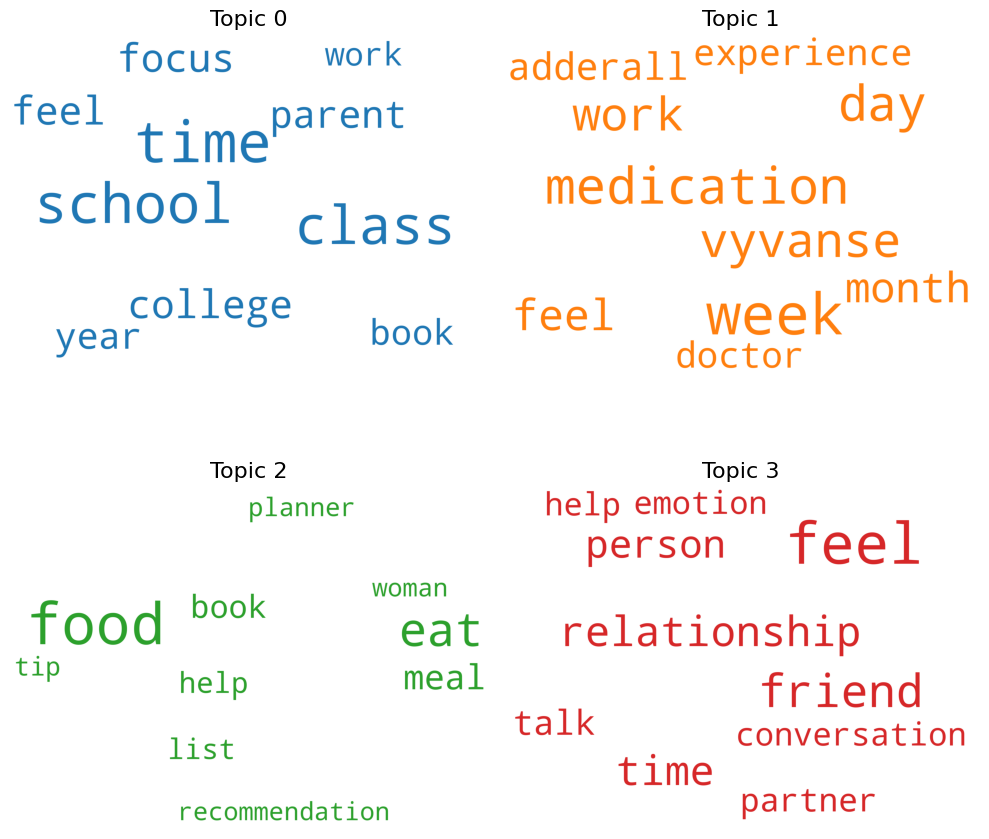

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_2.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=14))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()